# FASE 1: COMPRENDER EL NEGOCIO

**CONTEXTO**
En un esfuerzo por mejorar la salud pública y optimizar la toma de decisiones en políticas sanitarias, el Ministerio de Salud de Chile (MINSAL) ha encargado a nuestro equipo especializado en análisis de datos y modelado predictivo una tarea crítica: realizar un análisis detallado de las tendencias y patrones de mortalidad en el país. Este proyecto se enmarca en la estrategia nacional de salud, que busca reducir las desigualdades en salud, aumentar la esperanza de vida y mejorar la calidad de vida de toda la población chilena.

El proyecto tiene como objetivo principal el desarrollo de modelos predictivos robustos que permitan al MINSAL anticipar y responder de manera más efectiva a las necesidades emergentes en el ámbito de la salud pública. Para ello, nos basaremos en un extenso conjunto de datos que abarca registros de defunciones, diagnósticos de enfermedades, accesibilidad a servicios de salud, y otros indicadores que influyen en la salud de la población.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = pd.read_csv("C:/Users/Nico/Documents/GitHub/DefuncionesKedro/defuncioneskedro/data/01_raw/DEFUNCIONES.csv", sep=";", encoding='ISO-8859-1')

In [ ]:
dfo = df.copy()

# FASE 2: COMPRENDER LOS DATOS

Sacamos la cantidad total de datos con los que contamos

In [ ]:
df.shape

(13858, 27)

Vemos una pequeña muestra de los datos con la función head() en un rango que deseemos


In [ ]:
df.head(30)

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,2024,24-06-2024,Mujer,1,73,13604.0,Padre Hurtado,Metropolitana de Santiago,G309,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
1,2024,27-07-2024,Hombre,1,71,14101.0,Valdivia,De Los Ríos,I509,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
2,2024,28-03-2024,Hombre,1,61,6116.0,Requínoa,Del Libertador B. O'Higgins,I259,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
3,2024,02-07-2024,Mujer,1,19,13117.0,Lo Prado,Metropolitana de Santiago,Q433,Q00-Q99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
4,2024,20-07-2024,Hombre,1,77,8110.0,Talcahuano,Del Bíobío,J189,J00-J99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
5,2024,14-06-2024,Mujer,1,55,7101.0,Talca,Del Maule,C509,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
6,2024,05-08-2024,Hombre,1,73,4102.0,Coquimbo,De Coquimbo,I219,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
7,2024,16-01-2024,Mujer,2,11,13501.0,Melipilla,Metropolitana de Santiago,G403,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
8,2024,15-08-2024,Mujer,1,105,10101.0,Puerto Montt,De Los Lagos,R99X,R00-R99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
9,2024,15-05-2024,Hombre,1,102,4103.0,Andacollo,De Coquimbo,G309,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


Se visualiza las columnas las cuales tienen los datos con los que trabajaremos

In [ ]:
df.columns

Index(['ANO_DEF', 'FECHA_DEF', 'GLOSA_SEXO', 'EDAD_TIPO', 'EDAD_CANT',
       'CODIGO_COMUNA_RESIDENCIA', 'GLOSA_COMUNA_RESIDENCIA', 'GLOSA_REG_RES',
       'DIAG1', 'CAPITULO_DIAG1', 'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1',
       'GLOSA_GRUPO_DIAG1', 'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
       'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2',
       'LUGAR_DEFUNCION'],
      dtype='object')

Visualizamos 5 últimas filas de nuestros datos.

In [ ]:
df.tail()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
13853,2024,18-06-2024,Mujer,1,78,13130.0,San Miguel,Metropolitana de Santiago,K550,K00-K93,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
13854,2024,06-03-2024,Mujer,1,49,5101.0,Valparaíso,De Valparaíso,S269,S00-T98,...,X599,V01-Y98,Causas externas de morbilidad y de mortalidad,X58-X59,Exposición accidental a otros factores y a los...,X59,Exposición a factores no especificados,X599,EXPOSICIÓN A FACTORES NO ESPECIFICADOS QUE CAU...,Otro
13855,2024,15-07-2024,Hombre,1,55,2101.0,Antofagasta,De Antofagasta,C23X,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
13856,2024,25-02-2024,Hombre,1,95,10101.0,Puerto Montt,De Los Lagos,I64X,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
13857,2024,24-05-2024,Mujer,1,84,13201.0,Puente Alto,Metropolitana de Santiago,I110,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN





Realizamos un info() para poder visualizar las propiedades de nuestras columnas, lo cual nos arrojó que la mayoria de nuestras columnas son de tipo object.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13858 entries, 0 to 13857
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ANO_DEF                    13858 non-null  int64  
 1   FECHA_DEF                  13858 non-null  object 
 2   GLOSA_SEXO                 13858 non-null  object 
 3   EDAD_TIPO                  13858 non-null  int64  
 4   EDAD_CANT                  13858 non-null  int64  
 5   CODIGO_COMUNA_RESIDENCIA   13857 non-null  float64
 6   GLOSA_COMUNA_RESIDENCIA    13857 non-null  object 
 7   GLOSA_REG_RES              13857 non-null  object 
 8   DIAG1                      13858 non-null  object 
 9   CAPITULO_DIAG1             13858 non-null  object 
 10  GLOSA_CAPITULO_DIAG1       13858 non-null  object 
 11  CODIGO_GRUPO_DIAG1         13858 non-null  object 
 12  GLOSA_GRUPO_DIAG1          13858 non-null  object 
 13  CODIGO_CATEGORIA_DIAG1     13858 non-null  obj

Utilizando df.isna().sum() podemos apreciar cuales son las columnas que contienen datos nulos en conjunto con las que estan vacias

In [ ]:
df.isna().sum()

,0
ANO_DEF,0
FECHA_DEF,0
GLOSA_SEXO,0
EDAD_TIPO,0
EDAD_CANT,0
CODIGO_COMUNA_RESIDENCIA,0
GLOSA_COMUNA_RESIDENCIA,0
GLOSA_REG_RES,0
DIAG1,0
CAPITULO_DIAG1,0


Desglosamos un resumen estadístico de las columnas

In [7]:
df.describe()

,ANO_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA
count,341555.000000,341555.000000,341555.000000,341555.000000,341551.000000
mean,2022.841493,1.478576,1.017845,73.268062,9730.863189
std,0.785908,0.499659,0.206894,18.137759,4039.750861
min,2022.000000,1.000000,1.000000,1.000000,1101.000000
25%,2022.000000,1.000000,1.000000,65.000000,6114.000000
50%,2023.000000,1.000000,1.000000,77.000000,10101.000000
75%,2023.000000,2.000000,1.000000,86.000000,13121.000000
max,2024.000000,3.000000,4.000000,121.000000,99999.000000


Sacamos un grafico para saber como estan distribuidas las defunciones en cuanto a el sexo de la persona.

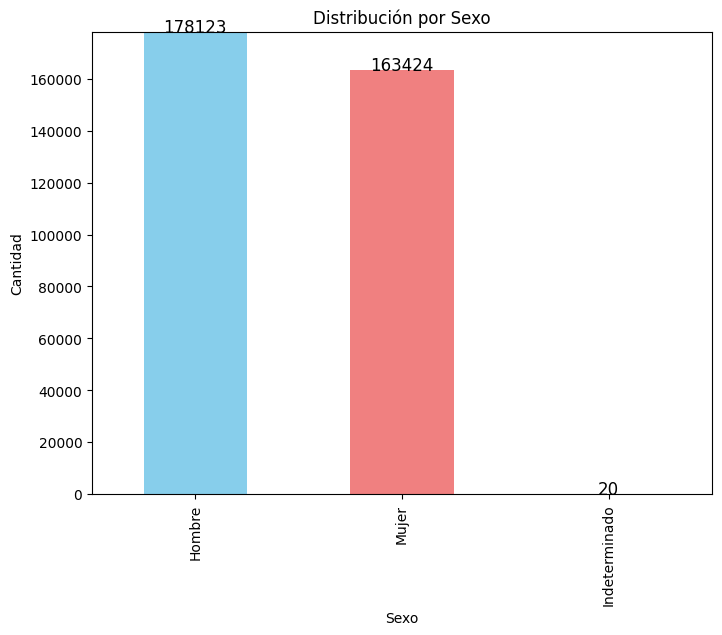

In [ ]:
conteo_sexo = df['GLOSA_SEXO'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
barras = conteo_sexo.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Añadir etiquetas con la cantidad exacta encima de cada barra
for i, count in enumerate(conteo_sexo):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Configuración del gráfico
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.ylim(0, conteo_sexo.max() + 10)  # Ajustar el límite superior del eje Y
plt.show()

En el grafico de abajo podemos visualizar un top 5 de enfermedades o razones que mas muertes han causado entre los años 2022 al 2024.

<ipython-input-39-5390786990b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')


Text(0.5, 1.0, 'Top 5 Enfermedades que más Muertes han Causado')

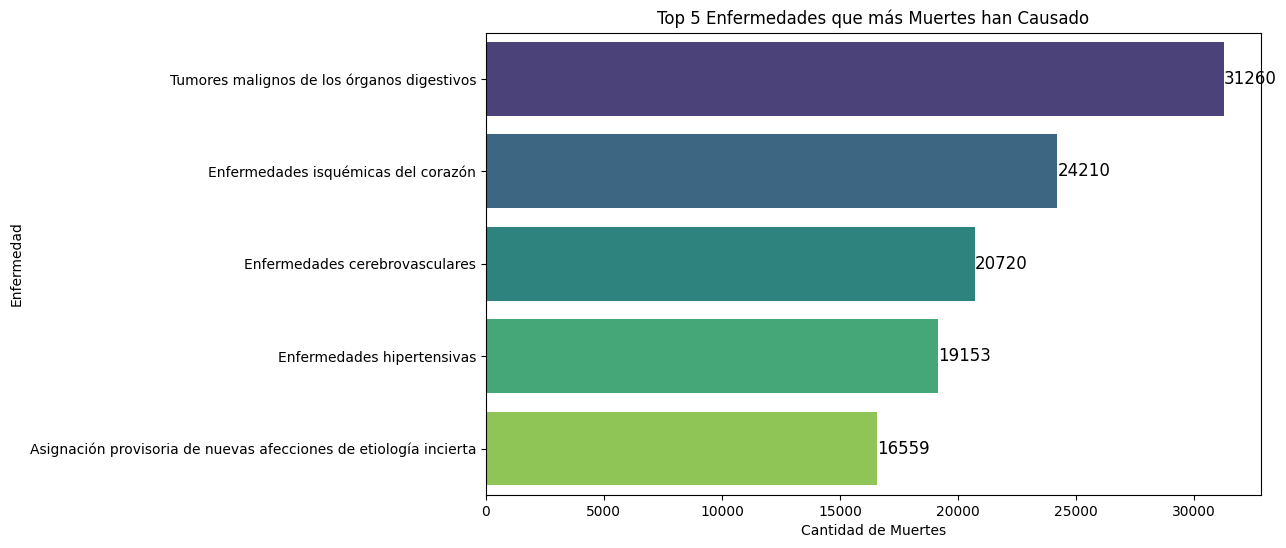

In [ ]:

top_enfermedades = df['GLOSA_GRUPO_DIAG1'].value_counts().head(5) # Cambia a 3 si deseas solo las 3 más comunes

# Paso 2: Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')

# Agregar el número total de muertes al final de cada barra
for i in range(len(top_enfermedades)):
    plt.text(top_enfermedades.values[i] + 0.2, i, str(top_enfermedades.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado')

Analizamos el número de defunciones por region y los ordena de mayor a menor según las defunciones.

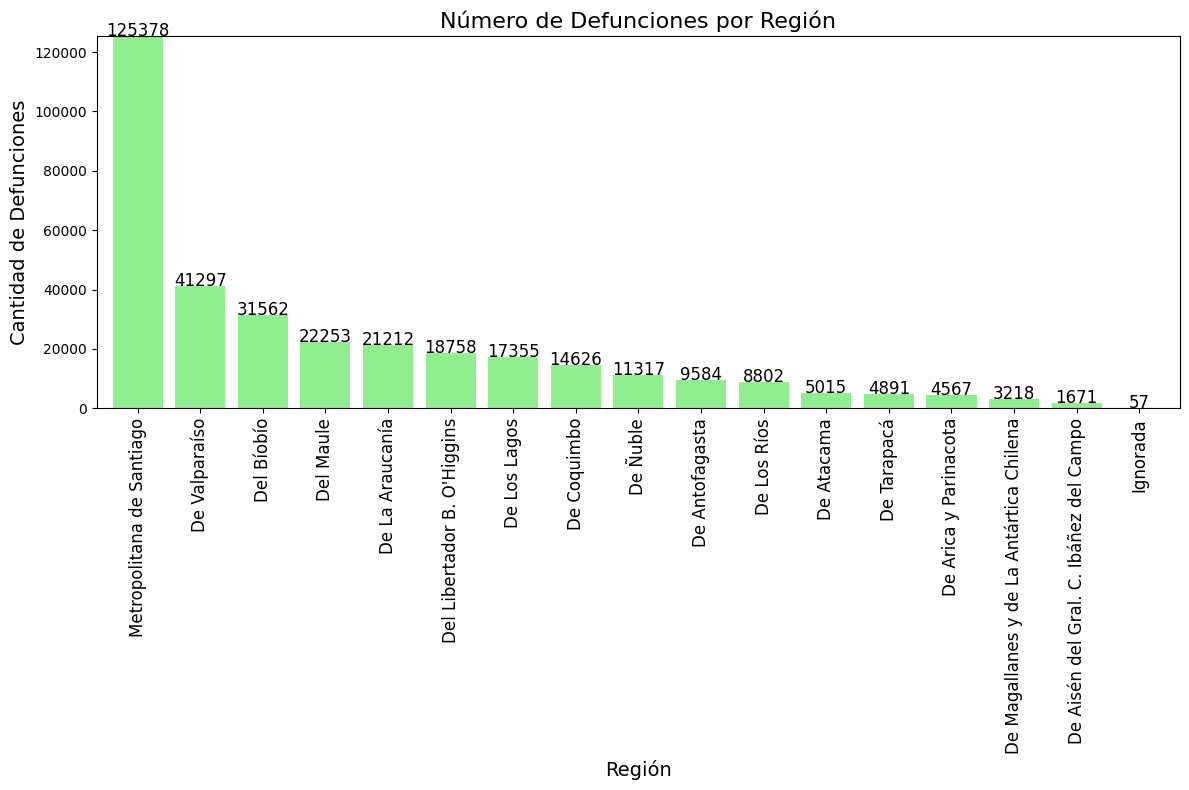

In [ ]:

# Contar el número de defunciones por región
conteo_defunciones_region = df['GLOSA_REG_RES'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
barras = conteo_defunciones_region.plot(kind='bar', color='lightgreen', width=0.8)

# Añadir etiquetas con la cantidad exacta encima de cada barra
for i, count in enumerate(conteo_defunciones_region):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Configuración del gráfico
plt.title('Número de Defunciones por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Cantidad de Defunciones', fontsize=14)
plt.ylim(0, conteo_defunciones_region.max() + 100)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


El gráfico generado muestra la distribución de las edades al momento de la defunción entre los años 2022 y 2024. Se observa un pico significativo alrededor de los 80 años, indicando que esta es la edad más común al fallecer durante este período. Aproximadamente 38,000 defunciones se registran en torno a esta edad, lo que sugiere que la mayor parte de las muertes ocurren en personas de edad avanzada. Este dato es crucial para entender las tendencias demográficas del país y podría influir en la planificación de políticas públicas orientadas a la atención de la población envejecida.

C:\Users\victo\AppData\Local\Temp\ipykernel_31368\1887378432.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.91666667 0.08333333 0.16666667 0.08333333 0.75       0.66666667
 0.16666667 0.5        0.16666667 0.08333333 0.41666667 0.08333333
 0.16666667 0.5        0.66666667 0.5        0.66666667 0.16666667
 0.08333333 0.33333333 0.16666667 0.33333333 0.41666667 0.41666667
 0.33333333 0.25       0.08333333 0.16666667 0.08333333 0.75
 0.08333333 0.25       0.16666667 0.75       0.08333333 0.08333333
 0.33333333 0.16666667 0.83333333 0.08333333 0.08333333 0.66666667
 0.08333333 0.08333333 0.91666667 0.66666667 0.41666667 0.08333333
 0.58333333 0.58333333 0.16666667 0.16666667 0.58333333 0.16666667
 0.08333333 0.08333333 0.58333333 0.33333333 0.16666667 0.16666667
 0.25       0.41666667 0.41666667 0.08333333 0.16666667 0.41666667
 0.16666667 0.16666667 0.91666667 0.16666667 0.16666667 0.33333333
 0.166

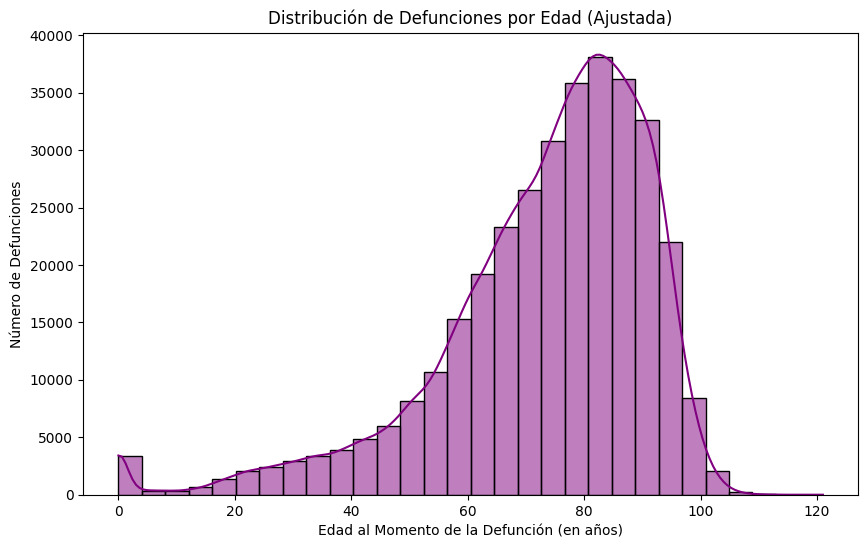

In [8]:
df['EDAD_AJUSTADA'] = df['EDAD_CANT'].copy()

# Convertir las edades a años según el valor de EDAD_TIPO
df.loc[df['EDAD_TIPO'] == 2, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 12  # Meses a años
df.loc[df['EDAD_TIPO'] == 3, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 365  # Días a años
df.loc[df['EDAD_TIPO'] == 4, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / (365 * 24)  # Horas a años
df.loc[df['EDAD_TIPO'] == 0, 'EDAD_AJUSTADA'] = None  # Ignorar

# Graficar la distribución de defunciones por edad ajustada
plt.figure(figsize=(10, 6))
sb.histplot(df['EDAD_AJUSTADA'].dropna(), bins=30, kde=True, color='purple')
plt.xlabel('Edad al Momento de la Defunción (en años)')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Edad (Ajustada)')
plt.show()

Existen defunciones las cuales no cuentan con una residencia definida, este codigo nos desglosa cuales son estas defunciones.

In [ ]:
filas_vacias = df[df['GLOSA_COMUNA_RESIDENCIA'].isna() | (df['GLOSA_COMUNA_RESIDENCIA'] == '')]

# Mostrar las filas
print(filas_vacias)

       ANO_DEF   FECHA_DEF GLOSA_SEXO  EDAD_TIPO  EDAD_CANT  \
7666      2024  28-02-2024     Hombre          1         83   
29729     2024  11-04-2024     Hombre          2          1   
42733     2024  26-04-2024      Mujer          1         52   
43641     2024  26-06-2024      Mujer          2          2   

       CODIGO_COMUNA_RESIDENCIA GLOSA_COMUNA_RESIDENCIA GLOSA_REG_RES  \
7666                        NaN                     NaN           NaN   
29729                       NaN                     NaN           NaN   
42733                       NaN                     NaN           NaN   
43641                       NaN                     NaN           NaN   

          LUGAR_DEFUNCION  
7666      Casa habitación  
29729  Hospital o Clínica  
42733                Otro  
43641  Hospital o Clínica  


Generamos un grafico de torta para saber los porcentajes de las defunciones del año 2022. 2023 y 2024

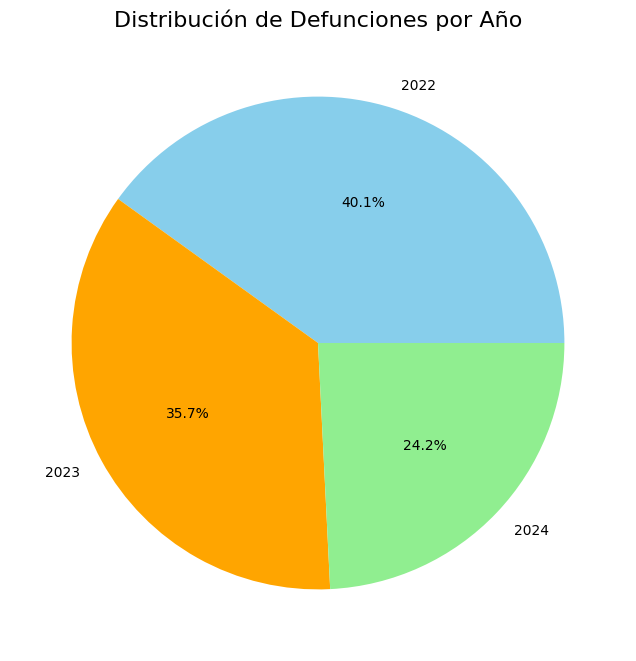

In [ ]:
conteo_defunciones_ano = df['ANO_DEF'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conteo_defunciones_ano, labels=conteo_defunciones_ano.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'pink', 'yellow'])
plt.title('Distribución de Defunciones por Año', fontsize=16)
plt.show()


# FASE 3: PREPARAR LOS DATOS

Primero eliminaremos las columnas que contienen mas datos nulos.

In [ ]:
# Lista de columnas a eliminar
columnas_a_eliminar = [
    'DIAG2',
    'CAPITULO_DIAG2',
    'GLOSA_CAPITULO_DIAG2',
    'CODIGO_GRUPO_DIAG2',
    'GLOSA_GRUPO_DIAG2',
    'CODIGO_CATEGORIA_DIAG2',
    'GLOSA_CATEGORIA_DIAG2',
    'CODIGO_SUBCATEGORIA_DIAG2',
    'GLOSA_SUBCATEGORIA_DIAG2'
]

# Eliminar las columnas del DataFrame
df = df.drop(columns=columnas_a_eliminar, axis=1, errors='ignore')



Pasaremos los datos de GLOSA_SEXO a tipo entero, para poder trabajar de mejor manera estos datos en un futuro.

Hombre = '1'
Mujer = '2'
Indefinido = '3'

In [6]:
df['GLOSA_SEXO'] = df['GLOSA_SEXO'].map({
    'Hombre': 1,
    'Mujer': 2,
    'Indeterminado': 3
})

# Verifica que el cambio se haya realizado correctamente
print(df['GLOSA_SEXO'].head())

0    2
1    1
2    1
3    2
4    1
Name: GLOSA_SEXO, dtype: int64


Los codigos estan CODIGO_COMUNA_RESIDENCIA estan en formato float64 lo cual no tiene relevancia ya que todos contienen ".0", por eso decidimos pasarlos a formato int

In [ ]:
df.dtypes

,0
ANO_DEF,int64
FECHA_DEF,object
GLOSA_SEXO,object
EDAD_TIPO,int64
EDAD_CANT,int64
CODIGO_COMUNA_RESIDENCIA,float64
GLOSA_COMUNA_RESIDENCIA,object
GLOSA_REG_RES,object
DIAG1,object
CAPITULO_DIAG1,object


In [ ]:
# Convertir los datos de la columna CODIGO_COMUNA_RESIDENCIA a enteros
# Primero,  reemplaza los valores no finitos con un valor que se pueda convertir a entero (por ejemplo, 0)
df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].fillna(0)

# Luego, convierte la columna a tipo entero
df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].astype(int)

# Verifica los cambios
print(df['CODIGO_COMUNA_RESIDENCIA'].head())

0    13604
1    14101
2     6116
3    13117
4     8110
Name: CODIGO_COMUNA_RESIDENCIA, dtype: int64


Remplazamos los datos nulos de GLOSA_COMUNA_RESIDENCIA y GLOSA_REG_RES a 'Desconocido'

In [ ]:
# Lidiar con valores nulos antes de la conversión
df['GLOSA_COMUNA_RESIDENCIA'] = df['GLOSA_COMUNA_RESIDENCIA'].fillna('Desconocido').astype(object)


In [ ]:
# Lidiar con valores nulos antes de la conversión
df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].fillna('Desconocido').astype(object)


Sacamos una cuenta de cuantas defunciones pertenecen a los rangos de edades.

In [4]:
# Realizar el conteo de la columna EDAD_TIPO
conteo_edad_tipo = df['EDAD_TIPO'].value_counts()

# Mostrar el resultado
print(conteo_edad_tipo)


EDAD_TIPO
1    338698
3      1080
4      1079
2       698
0         9
9         3
Name: count, dtype: int64


Como vimos arriba hay tipo de edades fuera del rango que son 0  y 9, procederemos a borrar esos rangos ya que no existen en nuuestro glosario.

In [5]:
# Filtrar el DataFrame para eliminar los valores 0 y 9 de la columna EDAD_TIPO
df = df[~df['EDAD_TIPO'].isin([0, 9])]

# Verificar el conteo después del filtrado
conteo_edad_tipo_filtrado = df['EDAD_TIPO'].value_counts()
print(conteo_edad_tipo_filtrado)

EDAD_TIPO
1    338698
3      1080
4      1079
2       698
Name: count, dtype: int64
